In [330]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [331]:
# Test and Train Datasets

# We define the train dataset with pandas library.
train_dataset = pd.read_csv(r'C:\Users\pesen\Desktop\new\train.csv') 

# We define the test dataset with pandas library.
test_dataset = pd.read_csv(r'C:\Users\pesen\Desktop\new\test.csv')

In [332]:
train_dataset.info()
test_dataset.info()

train_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [333]:
# We check the columns.

print(train_dataset.columns )
print(test_dataset.columns)

# Print Columns and Rows for Train and Test
print('\ntrain dataset: %s, test dataset %s' %(str(train_dataset.shape), str(test_dataset.shape)) )

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

train dataset: (891, 12), test dataset (418, 11)


In [334]:
# Total number of passengers in two data sets
print(train_dataset.shape[0] + test_dataset.shape[0])

1309


In [335]:
# Survival rate
train_dataset['Survived'].mean()

0.3838383838383838

In [336]:
# First 5 data
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
male_passenger = train_dataset[train_dataset['Sex']== 'male']
female_passenger = train_dataset[train_dataset['Sex']== 'female']

# Kid passengers' dataframe. I accepted under of 16 years old as kid.
kid_passenger = train_dataset[train_dataset['Age'] < 16]
male_kid_passenger = kid_passenger[kid_passenger['Sex'] == 'male']
female_kid_passenger = kid_passenger[kid_passenger['Sex'] == 'female']

# Creating adult male and female dataframes by dropping kid passengers
adult_male_passenger = male_passenger.drop(male_kid_passenger.index[:])
adult_female_passenger = female_passenger.drop(female_kid_passenger.index[:])

# Number of passengers according to sex and age
print ('Number of all passengers:', len(train_dataset))
print ('Number of male passengers:', len(male_passenger))
print ('Number of female passengers:', len(female_passenger))
print ('Number of adult male passengers:', len(adult_male_passenger))
print ('Number of adult female passengers:', len(adult_female_passenger))
print ('Number of kid passengers:', len(kid_passenger))

Number of all passengers: 891
Number of male passengers: 577
Number of female passengers: 314
Number of adult male passengers: 537
Number of adult female passengers: 271
Number of kid passengers: 83


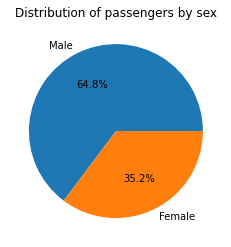

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [338]:
# Visualition of Sex

# Visualization of percentages of passengers by sex on pie chart
x = [len(male_passenger), len(female_passenger)]
label = ['Male', 'Female']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Distribution of passengers by sex')
plt.show()

print (train_dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

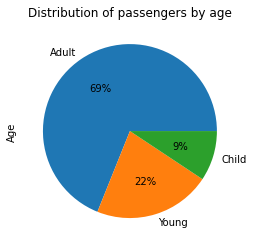

Average age of adult male passengers: 33.17312348668281
Average age of adult female passengers: 32.0
Average age of kid passengers: 6.369518072289157


In [339]:
# Visualization of Age

# We can also diversify age groups by defining a function:
def age_distribution(x):
    if x>=0 and x <16:
        return 'Child'
    elif x>=16 and x<=24:
        return 'Young'
    else:
        return 'Adult'
    
train_dataset['Age'].apply(age_distribution).value_counts()

# Visualization of percentages of passengers by age
train_dataset['Age'].apply(age_distribution).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of passengers by age')
plt.show()

print ('Average age of adult male passengers:', adult_male_passenger['Age'].mean())
print ('Average age of adult female passengers:', adult_female_passenger['Age'].mean())
print ('Average age of kid passengers:', kid_passenger['Age'].mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


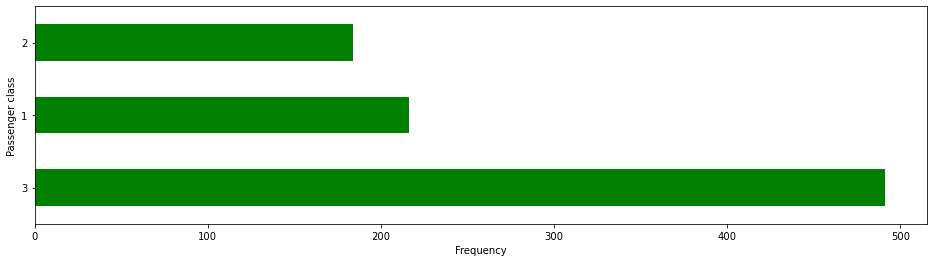

In [340]:
# Pclass

# Number of passengers according to class
# Pclass: A proxy for socio-economic status 1st = Upper 2nd = Middle, 3rd = Lower)
train_dataset['Pclass'].value_counts()

# there is no missing value on this feature
print (train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

train_dataset['Pclass'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Frequency')
plt.ylabel('Passenger class')
plt.show()

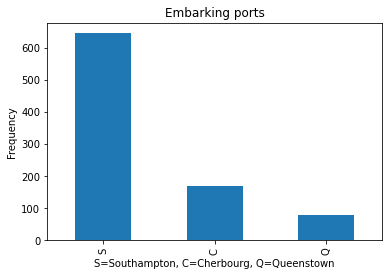

In [341]:
# Visualition of Embarked

# Filling the two missing values in 'Embarked' with the most occurred value, which is "S"
train_dataset['Embarked'] = train_dataset['Embarked'].fillna('S')
# Visualization of number of passengers by embarking ports 
train_dataset['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarking ports')
plt.ylabel('Frequency')
plt.xlabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

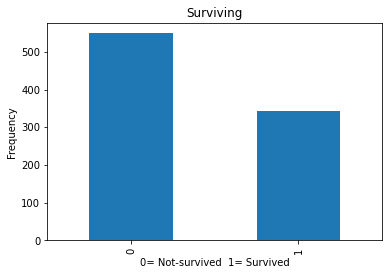

In [342]:
# ANALYZING OF SURVIVINGS

#Number of surviveds and not-surviveds
train_dataset['Survived'].value_counts()
train_dataset['Survived'].value_counts().plot(kind='bar', title='Surviving')
plt.xlabel('0= Not-survived  1= Survived')
plt.ylabel('Frequency')
plt.show()

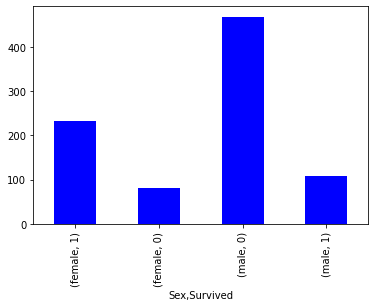

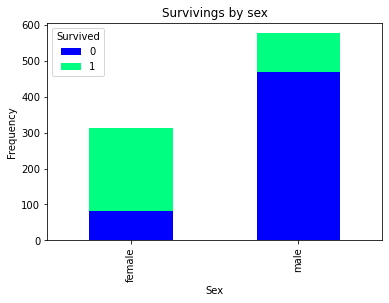

In [343]:
# Number of survivings by sex
train_dataset.groupby('Sex')['Survived'].value_counts()

# Visualization of survivings by sex
train_dataset.groupby('Sex')['Survived'].value_counts().plot(kind='bar', stacked=True, colormap='winter')
plt.show()

# Better visualization of survivings by sex
sex_survived = train_dataset.groupby(['Sex', 'Survived'])
sex_survived.size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.ylabel('Frequency')
plt.title('Survivings by sex')
plt.show()

In [344]:
# Usage of size(),unstack() while examining survivings by passenger class
class_survived = train_dataset.groupby(['Pclass', 'Survived'])
# size() - to count number of rows in each grouping
class_survived.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [345]:
# unstack() - to convert results into a more readable format.
class_survived.size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


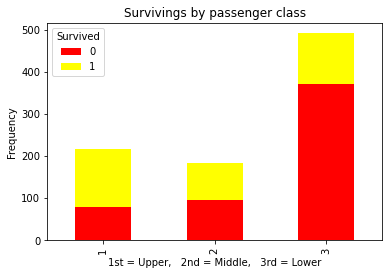

In [346]:
# Visualization of survivings by passenger class
class_survived.size().unstack().plot(kind='bar', stacked=True, colormap='autumn')
plt.xlabel('1st = Upper,   2nd = Middle,   3rd = Lower')
plt.ylabel('Frequency')
plt.title('Survivings by passenger class')
plt.show()

Surviving numbers of male passengers by passenger class:  Survived    0   1
Pclass           
1          77  45
2          91  17
3         300  47
Surviving numbers of female passengers by passenger class: Survived   0   1
Pclass          
1          3  91
2          6  70
3         72  72


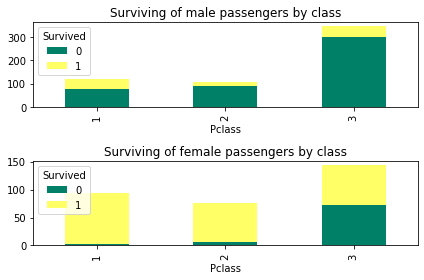

In [347]:
# Numbers of survived/not survived passengers by sex and passenger class
print ('Surviving numbers of male passengers by passenger class: ',
male_passenger.groupby(['Pclass', 'Survived']).size().unstack())

print ('Surviving numbers of female passengers by passenger class:',
female_passenger.groupby(['Pclass', 'Survived']).size().unstack())

#Visualization of male and female survivings by passenger class
fig, axes = plt.subplots(nrows=2, ncols=1)
male_passenger.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Surviving of male passengers by class',
                                                                    stacked=True, colormap='summer', ax=axes[0])
female_passenger.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Surviving of female passengers by class',
                                                                      stacked=True, colormap='summer', ax=axes[1])
plt.tight_layout()
plt.show()

In [348]:
#Show the missing columns

#List columns with missing values in training set
print(train_dataset.columns[train_dataset.isna().any()])

#Also we can show so the mÅŸssing values
print("Missings in the train data: ")
display(train_dataset.isnull().sum())

print("Missings in the test data: ") 
display(test_dataset.isnull().sum())

Index(['Age', 'Cabin'], dtype='object')
Missings in the train data: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missings in the test data: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [349]:
#train ve test data setini pandas kÃ¼tÃ¼phanesinin concat metoduyla birleÅŸtiren fonksyon

def concat_df(train_dataset,test_dataset):
    return pd.concat([train_dataset, test_dataset], sort= True).reset_index(drop=True)

In [350]:
#EÄŸitim verilerinde yaÅŸ, kabin ve baÅŸlangÄ±Ã§lar sÃ¼tununda eksiklerimiz var.
#Test veri setinde yaÅŸ, Ã¼cret ve kabin sÃ¼tununda eksiklikler var. 
#Her iki veri setini birleÅŸtireceÄŸiz ve tÃ¼m veri seti iÃ§in veri temizliÄŸini gerÃ§ekleÅŸtireceÄŸiz.
#train ve test 

df_all = concat_df(train_dataset , test_dataset)


In [351]:
#1-Age

#yaÅŸ sÃ¼tÃ¼numuzun yÃ¼zdelik olarak ne kadar eksik verisi olduÄŸunu gÃ¶rmek iÃ§in
print("Missings for Age in the entire data set: " + str(df_all['Age'].isnull().sum()))
print("Missings in percentage: " + str(round(df_all['Age'].isnull().sum()/len(df_all)*100,0)))

#yaÅŸ veri setimizin iÃ§inde deÄŸerlendirmeye devam ediyoruz
      
print('Median for Age seperated by Pclass: ')    
display(train_dataset.groupby('Pclass')['Age'].median())      
print('Median for Age seperated by Pclass and Sex:')    
display(train_dataset.groupby(['Pclass','Sex'])['Age'].median()) 
print('Number of cases:')    
display(train_dataset.groupby(['Pclass','Sex'])['Age'].count()) 
      
#replace the missings values with the medians of each group
df_all['Age']= df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))


Missings for Age in the entire data set: 263
Missings in percentage: 20.0
Median for Age seperated by Pclass: 


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median for Age seperated by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Number of cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [352]:
#2-Ãœcret  

df_all.loc[df_all['Fare'].isnull()]   
      
#TÃ¼m veri setinde tek bir eksik Ã¼cret deÄŸerimiz var. Bay Thomas      
      
#loc cases which are similar to Mr.Thomas and use the median of fare to replace  the missing for his data set
      
mr_thomas=df_all.loc[(df_all['Pclass']==3)&(df_all['SibSp']==0)&(df_all['Embarked']=='S')]['Fare'].median()
print(mr_thomas)
      


7.925


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

There are 147 different values for Cabin and 687 cases are missing.


M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

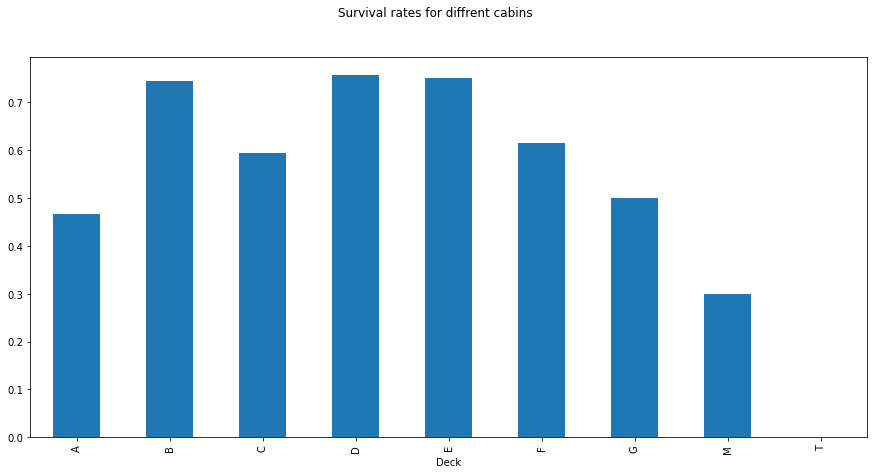

In [353]:
#3-Kabin
      
display(train_dataset['Cabin'].unique())
print("There are "+ str(train_dataset['Cabin'].nunique()) + " different values for Cabin and " + str(train_dataset['Cabin'].isnull().sum()) + " cases are missing.")

#keep all first letters of cabin in a new variable and use "M" for each missing
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M' )
      
df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar',figsize=(15,7))
plt.suptitle('Survival rates for diffrent cabins')
            
#Hayatta kalma oranlarÄ±nda Ã¶nemli farklÄ±lÄ±klar var Ã§Ã¼nkÃ¼ Ã¼st gÃ¼vertelerdeki konuklar filikalarda daha hÄ±zlÄ±ydÄ±.
#BazÄ± desteleri gruplayacaÄŸÄ±z.      
      
      
idx=df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx,'Deck'] = 'A'   
df_all['Deck']= df_all['Deck'].replace(['A','B','C'],'ABC')
df_all['Deck']= df_all['Deck'].replace(['D','E'],'DE')
df_all['Deck']= df_all['Deck'].replace(['F','G'],'FG')      
df_all['Deck'].value_counts()

In [354]:
#4-Embarked
      
df_all.loc[df_all['Embarked'].isnull()]
           
df_all.loc[(df_all['Pclass'] == 1) & (df_all['Fare'] <= 80) & (df_all ['Deck'] == 'ABC')]['Embarked'].value_counts()

#BaÅŸlamak iÃ§in sadece iki eksik var.
#Ãœcret davasÄ± iÃ§in zaten denediÄŸimiz gibi, eksik deÄŸeri deÄŸiÅŸtirmek iÃ§in benzer durumlara bakabiliriz.
      
df_all.loc[df_all['Embarked'].isnull(),'Embarked'] = 'S'
           
print("Missing in the data:")
display(df_all.isnull().sum())

Missing in the data:


Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

For age, each category has a different number of cases:
For fare, each category has a different number of cases:


Text(0.5, 0.98, 'Survival rates for fare categories')

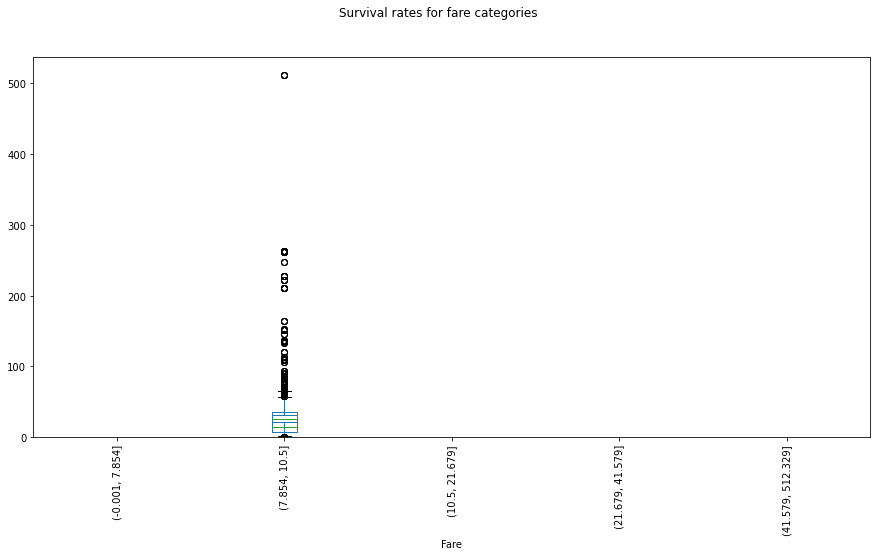

In [355]:
df_all.boxplot(column=['Fare'], figsize=(15,7))

df_all.boxplot(column=['Age'], figsize=(15,7))
      
df_all['Fare'] = pd.qcut(df_all['Fare'], 5 )
df_all['Age'] = pd.cut(df_all['Age'].astype(int), 5 )

print("For age, each category has a different number of cases:")
df_all['Age'].value_counts()
      
print("For fare, each category has a different number of cases:")
df_all['Fare'].value_counts()

df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean()

df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean()      

df_all[['Age', 'Survived']].groupby('Age')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for age categories')      
 
df_all[['Fare', 'Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for fare categories')         
  

Text(0.5, 0.98, 'Survival rates for family size categories')

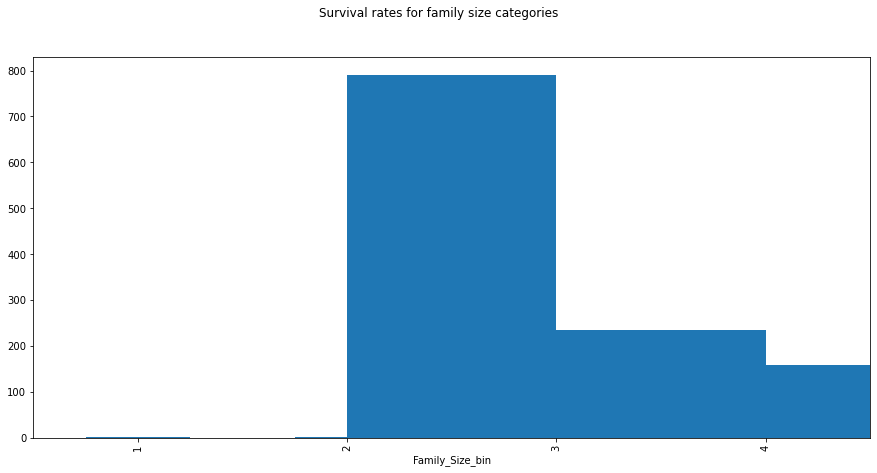

In [356]:
#5-Sibs and Parch

#Veri setimizde bize aile bÃ¼yÃ¼klÃ¼ÄŸÃ¼ hakkÄ±nda bir ÅŸeyler sÃ¶yleyen iki ilginÃ§ deÄŸiÅŸken var. 
#SibSp, bir yolcunun kaÃ§ tane kardeÅŸi ve eÅŸi olduÄŸunu tanÄ±mlar ve kaÃ§ tane ebeveyn ve Ã§ocuk parch. 
#Bu deÄŸiÅŸkenleri Ã¶zetleyebilir ve aile boyutunu elde etmek iÃ§in 1 ekleyebiliriz (her yoldan geÃ§en iÃ§in).     
      
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].hist(figsize=(15,7))
      
df_all['Family_Size_bin']=df_all['Family_Size'].map(lambda s: 1 if s == 1 else (2 if s == 2 else (3 if 3 <= s <= 4 else (4 if s >= 5 else 0))))

df_all['Family_Size_bin'].value_counts()

#Bir tez, ailelerin hayatta kalma ÅŸansÄ±nÄ±n bekarlara gÃ¶re daha yÃ¼ksek olduÄŸu, Ã§Ã¼nkÃ¼ kendilerini daha iyi destekleyebildikleri ve Ã¶ncelikli olarak kurtarÄ±ldÄ±klarÄ±dÄ±r.
# Bununla birlikte, aileler Ã§ok bÃ¼yÃ¼kse, istisnai bir durumda koordinasyon muhtemelen Ã§ok zor olacaktÄ±r.

df_all[['Family_Size_bin','Survived']].groupby('Family_Size_bin')['Survived'].mean().plot(kind='bar' , figsize=(15,7))
plt.suptitle('Survival rates for family size categories')


In [357]:
#6-Tickets
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

#Bilet sÄ±klÄ±klarÄ± ile hayatta kalma oranlarÄ± arasÄ±nda bir korelasyon bekliyoruz, Ã§Ã¼nkÃ¼ aynÄ± bilet numaralarÄ±, insanlarÄ±n birlikte seyahat ettiklerinin bir gÃ¶stergesi.
df_all[['Ticket_Frequency','Survived']].groupby('Ticket_Frequency').mean()


,Survived
Ticket_Frequency,
1,0.270270
2,0.513812
3,0.653465
4,0.727273
5,0.333333
6,0.210526
7,0.208333
8,0.384615
11,0.000000


In [358]:
#7-Title

#Ä°sim bize bir yolcunun sosyoekonomik durumu hakkÄ±nda Ã§ok Ã¶nemli bilgiler veriyor. 
#Birinin evli olup olmadÄ±ÄŸÄ± veya daha yÃ¼ksek bir sosyal statÃ¼nÃ¼n gÃ¶stergesi olabilecek resmi bir unvanÄ± olup olmadÄ±ÄŸÄ± sorusuna cevap verebiliriz.

df_all['Title'] = df_all['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] =1
df_all['Title'].nunique()
#Veri setimizde pek Ã§ok farklÄ± baÅŸlÄ±k var.
# YalnÄ±zca 10'dan fazla davaya sahip baÅŸlÄ±ÄŸÄ± dikkate alÄ±yoruz, diÄŸerlerinin tÃ¼mÃ¼nÃ¼ "misc" kategorisine atayacaÄŸÄ±z.
title_names = (df_all['Title'].value_counts() < 10)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df_all.groupby('Title')['Title'].count()
                

C:\Users\pesen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Title
 Master     61
 Miss      260
 Mr        757
 Mrs       197
Misc        34
Name: Title, dtype: int64

In [359]:
#YolcularÄ±n soyadlarÄ±nÄ± belirleyeceÄŸiz. 
#Daha sonra hem eÄŸitimde hem de test veri setinde bulunan herhangi bir aile Ã¼yesi olup olmadÄ±ÄŸÄ±nÄ± gÃ¶rebiliriz.
import string

def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        family = name_no_bracket.split(',')[0] 
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        families.append(family)
        
    return families
df_all['Family'] = extract_surname(df_all['Name'])

df_all['Family'].nunique()


875

Survival rates grouped by families of women in dataset:


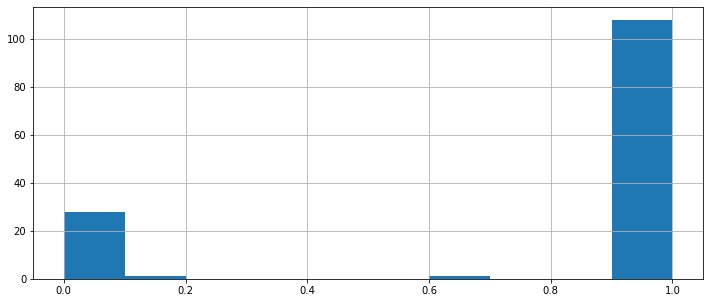

In [360]:
#YÃ¼ksek lisans derecesine sahip kiÅŸiler ve kadÄ±nlar, Ã¶nemli Ã¶lÃ§Ã¼de daha sÄ±k hayatta kaldÄ±lar ve aynÄ± zamanda ortalama olarak daha bÃ¼yÃ¼k ailelere sahipler. 
#EÄŸitim veri setinde bir usta veya kadÄ±n hayatta kalan olarak iÅŸaretlenirse, test veri setindeki aile Ã¼yelerinin de hayatta kalacaÄŸÄ±nÄ± varsayÄ±yoruz.
      
df_all[['Title','Survived','Family_Size']].groupby('Title').mean()

print('Survival rates grouped by families of women in dataset:')
df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

#Aile bÃ¼yÃ¼klÃ¼ÄŸÃ¼ 2 veya daha fazla olan kadÄ±nlarda, Ã§oÄŸu zaman hepsi veya hiÃ§biri Ã¶lmez.

master_families = df_all.loc[df_all['Title'] == 'Master']['Family'].tolist()
df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean().hist(figsize=(12,5))

#AynÄ±sÄ±, unvanÄ±nda kaptan olan yolcu aileleri iÃ§in de geÃ§erlidir.

women_rate = df_all.loc[(df_all['Sex'] == 'female') & (df_all['Family_Size'] > 1 )].groupby('Family')['Survived'].mean()
master_rate = df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()

combined_rate = women_rate.append(master_rate)

combined_rate_df = combined_rate.to_frame().reset_index().rename(columns={'Survived' : 'Survival_quota'}).drop_duplicates(subset='Family')

df_all =pd.merge(df_all,combined_rate_df ,how = 'left')
                                                                            
                                                                            
                                                                            
df_all['Survival_quota_NA'] = 1
df_all.loc[df_all['Survival_quota'].isnull(), 'Survival_quota_NA']=0                                                                            
df_all['Survival_quota']=df_all['Survival_quota'].fillna(0)   

In [ ]:
drop_values = ['Name','Ticket','Cabin'] #datamÄ±zÄ± incelediÄŸimizde bazÄ± sÃ¼tÃ¼nlerin bizim verimiz iÃ§in gerekli olmadÄ±ÄŸÄ±nÄ± fark edip Ã§Ä±kartÄ±k.
train_dataset = train_dataset.drop(drop_values,axis=1)

train_dataset = train_dataset.dropna() #bazÄ± eksik verileri temizledik.

train_dataset.info()

passengers = []
columnss = ['Pclass','Sex','Embarked']  #Pclass:yolcu sÄ±nÄ±fÄ±,Embarked:biniÅŸ noktasÄ±
for columnss in sutunlar:
    passengers.append(pd.get_dummies(train_dataset[columnss])) #kategorik verileri yer tutucu ile deÄŸiÅŸtirmek iÃ§in get_dummies kullandÄ±k.

passengers = pd.concat(passengers, axis=1) #Dataframe elde etmek iÃ§in concat methodu kullandÄ±k.
print(passengers)

passengers = passengers.drop(['female'], axis=1)
train_dataset = pd.concat((train_dataset,yolcular),axis=1)
train_dataset = train_dataset.drop(['Pclass','Sex','Embarked'],axis=1)

print(train_dataset)

In [361]:

X = train_dataset.values
Y = train_dataset['Survived'].values

X = np.delete(X,1,axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3, random_state=0) #test size 30 atadÄ±k train test de 70 oldu

siniflama = tree.DecisionTreeClassifier(max_depth=5)
siniflama.fit(X_train,y_train)
skor = siniflama.score(X_test,y_test)

print("Score: ",skor)

tahminler = siniflama.predict(X)
as_egitim = accuracy_score(tahminler, Y)

print("DoÄŸruluk tablosu skoru: ", as_egitim)
#YukarÄ±da uygulamanÄ±n doÄŸruluk skorunu elde ettik ancak, doÄŸruluk skoru tek baÅŸÄ±na bir baÅŸarÄ± Ã¶lÃ§me kriteri olamaz.
#DiÄŸer kriterlere (hata oranÄ±, hassasiyet vb.) bakabilmek iÃ§in confusion matrix kullandÄ±k. 
#Bunun iÃ§in pandas kÃ¼tÃ¼phanesinden crosstab() metodu kullandÄ±k.

confusion_matrix = pd.crosstab(Y, tahminler, rownames=['GerÃ§ek'], colnames=['Tahmin'])
print (confusion_matrix)

#--------------------------------------------------------
#X_test = StandardScaler().fit_transform(test_dataset)       
model = RandomForestClassifier(criterion = 'gini',n_estimators=1750,max_depth=7,min_samples_split =6, min_samples_leaf = 6, max_features = 'auto', oob_score= True, random_state=42, n_jobs=-1,verbose =1)
            
model.fit(X_train, y_train)
predictions = model.predict(X_test)  

score = model.score(X_test, y_test)

print(score)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB
     1  2  3  female  male  C  Q  S
0    0  0  1       0     1  0  0  1
1    1  0  0       1     0  1  0  0
2    0  0  1       1     0  0  0  1
3    1  0  0       1     0  0  0  1
4    0  0  1       0     1  0  0  1
..  .. .. ..     ...   ... .. .. ..
885  0  0  1       1     0  0  1  0
886  0  1  0       0     1  0  0  1
887  1  0  0       1     0  0  0  1
889  1  0  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

0.813953488372093


[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.2s finished
